This is a very useful guide into TF-IDF calculation and K-means clustering using Sci-Kit Learn:

https://jonathansoma.com/lede/algorithms-2017/classes/clustering/k-means-clustering-with-scikit-learn/

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer #SciKit-Learn Machine Learning Library
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import random
from wordcloud import (WordCloud, get_single_color_func) #custom functions defined to allow grouped colouring in wordcloud
#see https://amueller.github.io/word_cloud/auto_examples/colored_by_group.html

In [2]:
#run to power colour customisations in wordcloud

class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [63]:
df = pd.read_csv("grid_100m_newest_tf_idf_ver.csv")

#now let's only retain the row which will be visualised 
df = df.loc[df['PageNumber'].isin([1034])]

df = df.astype(str).groupby('PageNumber')['custom_f_1'].apply(lambda x: ' '.join(x)).reset_index()

df

,PageNumber,custom_f_1
0,1034,cruise kevin ship fringe capers architecture s...


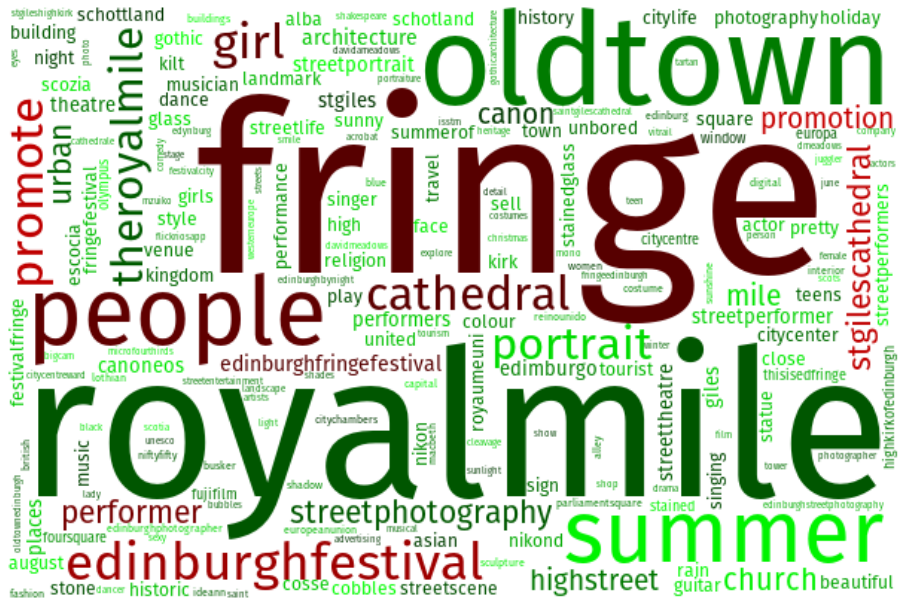

In [64]:
#concatenate column/ PD series into one long string for tokenisation
one_string = df['custom_f_1'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(one_string)
word_dist = nltk.FreqDist(words)

#change according to top 10 tfidf tags
color_to_words = {'red': ['people','promotion', 
                        'performer','cathedral',
                          'edinburghfringefestival', 
                          'stgilescathedral', 'edfringe', 
                          'promote',
                          'festival', 'edinburghfestival',
                          'edinburghfringe',
                          'fringe','girl']}
 
                 
default_color = 'green'
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

#generate wordcloud
cloud = WordCloud(font_path='FiraSans-Regular.otf',width=600, height=400, max_font_size=160, 
                  background_color='white').generate_from_frequencies(word_dist)
plt.figure(figsize=(16,12))
#plt.imshow(cloud, interpolation='bilinear')
plt.imshow(cloud.recolor(color_func=grouped_color_func), interpolation="bilinear")
plt.axis('off')
plt.show()